# Conjoint analysis

# Step 1: Creation of the bundles


In [1]:
library(radiant)
library(tidyverse)
library(reshape2)
library(readxl)

Warning message:
"il pacchetto 'radiant' è stato creato con R versione 4.3.3"
Caricamento del pacchetto richiesto: radiant.data

Warning message:
"il pacchetto 'radiant.data' è stato creato con R versione 4.3.3"
Caricamento del pacchetto richiesto: magrittr

Caricamento del pacchetto richiesto: ggplot2

Warning message:
"il pacchetto 'ggplot2' è stato creato con R versione 4.3.2"
Caricamento del pacchetto richiesto: lubridate


Caricamento pacchetto: 'lubridate'


I seguenti oggetti sono mascherati da 'package:base':

    date, intersect, setdiff, union


Caricamento del pacchetto richiesto: tidyr


Caricamento pacchetto: 'tidyr'


Il seguente oggetto è mascherato da 'package:magrittr':

    extract


Caricamento del pacchetto richiesto: dplyr

Warning message:
"il pacchetto 'dplyr' è stato creato con R versione 4.3.2"

Caricamento pacchetto: 'dplyr'


I seguenti oggetti sono mascherati da 'package:stats':

    filter, lag


I seguenti oggetti sono mascherati da 'package:base':

    in

In [ ]:
#Creation of the bundles (before the distribution of the survey) 

attribute1 <- 'Digitalized tools to monitor consumption;only on the bill;daily summary through website; real-time monitoring through app'
attribute2<- 'Flexibility of the tariff;fixed rate;two-hourly rate;multi-hourly rate'
attribute3 <- 'Speed of contracts;directly on the website;setup with quick verification;activation after one week'
attribute4 <- 'Reliability of technical assistance;24h available;standard business hours; email support'

attributes <- c(attribute1, attribute2,attribute3, attribute4)
bundles <- doe(attributes, seed = 42)
bundles$part

trial,Digitalized_tools_to_monitor_consumption,Flexibility_of_the_tariff,Speed_of_contracts,Reliability_of_technical_assistance
<int>,<fct>,<fct>,<fct>,<fct>
8,only_on_the_bill,fixed_rate,activation_after_one_week,standard_business_hours
10,only_on_the_bill,two-hourly_rate,directly_on_the_website,24h_available
24,only_on_the_bill,multi-hourly_rate,setup_with_quick_verification,email_support
30,daily_summary_through_website,fixed_rate,directly_on_the_website,email_support
41,daily_summary_through_website,two-hourly_rate,setup_with_quick_verification,standard_business_hours
52,daily_summary_through_website,multi-hourly_rate,activation_after_one_week,24h_available
58,real-time_monitoring_through_app,fixed_rate,setup_with_quick_verification,24h_available
72,real-time_monitoring_through_app,two-hourly_rate,activation_after_one_week,email_support
74,real-time_monitoring_through_app,multi-hourly_rate,directly_on_the_website,standard_business_hours


In [3]:
#D-efficiency 
bundles$eff

,Trials,D-efficiency,Balanced
,<int>,<dbl>,<lgl>
1,9,1,TRUE


# Step 2: Conjoint analysis

In [4]:
#After we got our responses through the survey, we load the data and transform the attributes into factors.


url <- "https://raw.githubusercontent.com/Valeria-Riccardo/market-analytics-datasets/main/Conjoint.xlsx"
destfile <- tempfile(fileext = ".xlsx")
download.file(url, destfile, mode = "wb")
df <- read_excel(destfile)

colnames(df) <- c('Id', 'Respondent', 'A1', 'A2', 'A3', 'A4', 'Ratings')
df <- df %>%
  mutate(across(A1:A4, as.factor))

print(df)

# A tibble: 810 × 7
      Id Respondent A1                               A2      A3    A4    Ratings
   <dbl>      <dbl> <fct>                            <fct>   <fct> <fct>   <dbl>
 1     6          1 daily summary through website    multi-… acti… 24h …       5
 2     1          1 only on the bill                 fixed … acti… stan…       3
 3     8          1 real-time monitoring through app two-ho… acti… emai…       4
 4     4          1 daily summary through website    fixed … dire… emai…       3
 5     2          1 only on the bill                 two-ho… dire… 24h …       4
 6     9          1 real-time monitoring through app multi-… dire… stan…       5
 7     5          1 daily summary through website    two-ho… setu… stan…       4
 8     3          1 only on the bill                 multi-… setu… emai…       3
 9     7          1 real-time monitoring through app fixed … setu… 24h …       4
10    15          2 daily summary through website    multi-… acti… 24h …       1
# ℹ 800 

In [5]:
#levels
sapply(df[,3:6], FUN = levels)

#A1: digitalized tools to monitor consumption
#A2: flexibility of the tariff
#A3: speed of activation of the contract
#A4: reliability of technical assistance

A1,A2,A3,A4
daily summary through website,fixed rate,activation after one week,24h available
only on the bill,multi-hourly rate,directly on the website,email support
real-time monitoring through app,two-hourly rate,setup with quick verification,standard business hours


In [ ]:
#conjoint analysis
data.conjoint <- conjoint(df, rvar = "Ratings", evar = c('A1', 'A2', 'A3', 'A4'))
summary(data.conjoint)

Conjoint analysis
Data                 : df 
Response variable    : Ratings 
Explanatory variables: A1, A2, A3, A4 

Conjoint part-worths:
   Attributes                           Levels     PW
 A1           daily summary through website     0.000
 A1           only on the bill                 -0.196
 A1           real-time monitoring through app  0.193
 A2           fixed rate                        0.000
 A2           multi-hourly rate                 0.107
 A2           two-hourly rate                   0.189
 A3           activation after one week         0.000
 A3           directly on the website           0.126
 A3           setup with quick verification    -0.163
 A4           24h available                     0.000
 A4           email support                    -0.696
 A4           standard business hours          -0.563
 Base utility ~                                 3.293

Conjoint importance weights:
 Attributes    IW
         A1 0.249
         A2 0.121
         A3 0.185
   

The baseline utility (average rating) is 3.293 when all attributes are at their reference levels. It is defined as the average perceived value of a product or service before adding any variations in attributes.

Part-worth utility quantifies the contribution of each attribute level to the overall preference for a product. It helps in understanding how much a specific feature influences a consumer's decision relative to other features.
The highest importance attribute is the Reliability of technical assistance (0.445). Email support and standard business hours assistance increasingly reduce the utility when the 24h available assistance option is the reference.
In relation to the other attribitues, the two-hourly tariff is the most preferred one, as well as the immediate activation of the contract through website and possibility to have a real-time track of the energy consumption. 
 


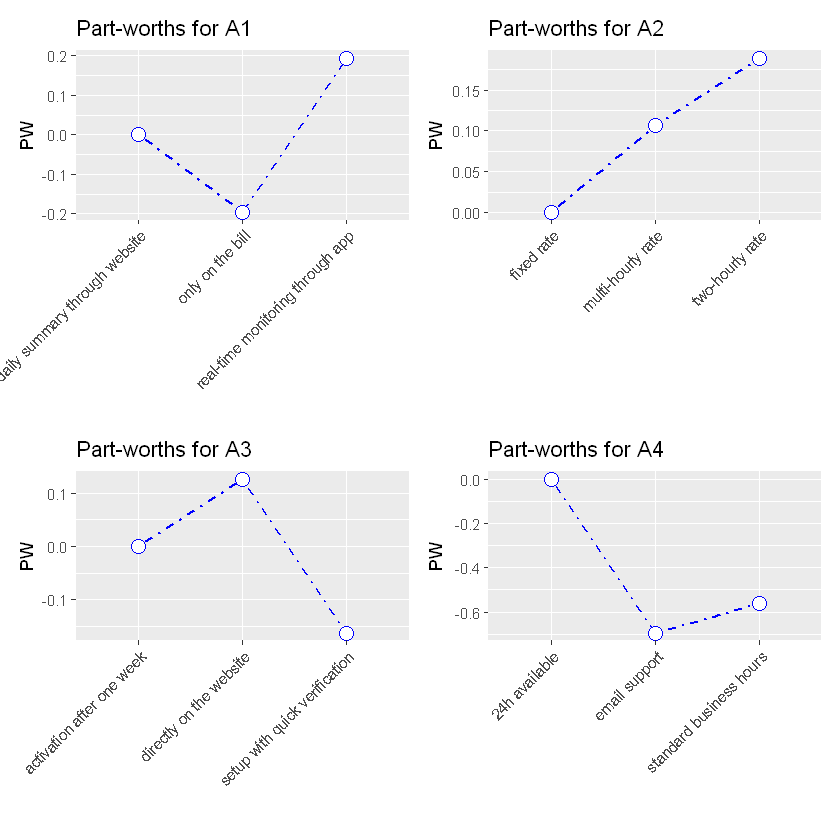

In [7]:
plot(data.conjoint)

In [ ]:
#full model list for a better understanding of the model

model_list <- data.conjoint$model_list
print(model_list)

$full
$full$model

Call:
lm(formula = formula, data = cdat)

Coefficients:
                       (Intercept)                  A1only on the bill  
                            3.2926                             -0.1963  
A1real-time monitoring through app                 A2multi-hourly rate  
                            0.1926                              0.1074  
                 A2two-hourly rate           A3directly on the website  
                            0.1889                              0.1259  
   A3setup with quick verification                     A4email support  
                           -0.1630                             -0.6963  
         A4standard business hours  
                           -0.5630  


$full$coeff
                                label coefficient  std.error   t.value
1                         (Intercept)   3.2925926 0.11767280 27.980914
2                 A1|only on the bill  -0.1962963 0.09607944 -2.043062
3 A1|real-time monitoring through app   

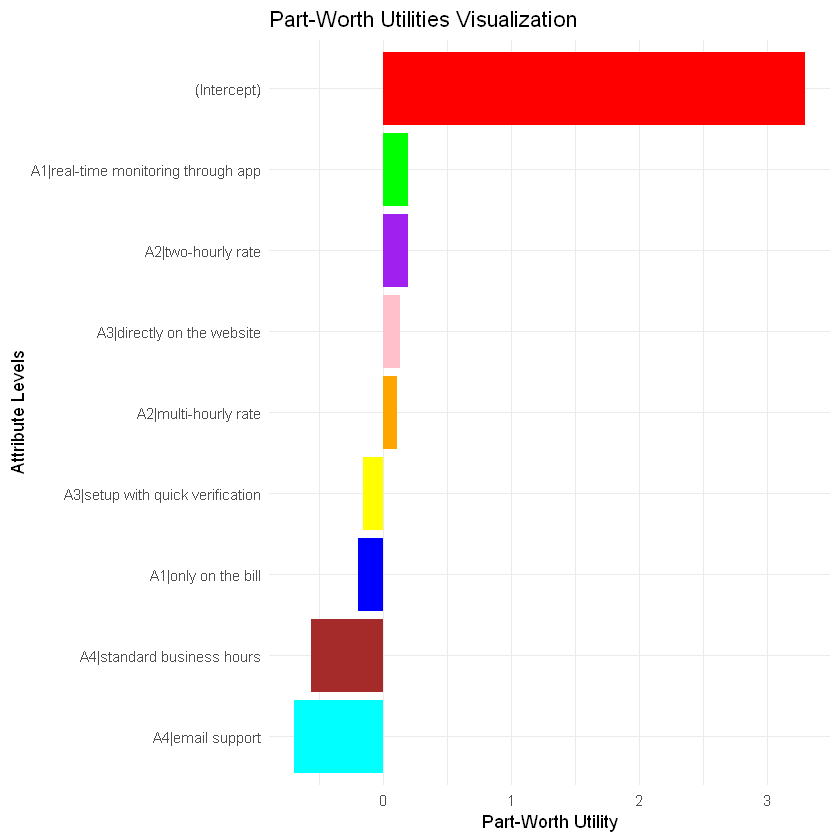

In [ ]:
#Part-worth visualization (think about it, because the reference levels are not shown)

coeffs <- data.conjoint$model_list$full$coeff
coeffs <- data.frame(coeffs)
coeffs <- coeffs[,1:2]

ggplot(coeffs, aes(x = reorder(label, coefficient), y = coefficient, fill = label)) +
  geom_bar(stat = "identity", show.legend = FALSE) +  # Bar chart
  coord_flip() +  # Flip for readability
  labs(title = "Part-Worth Utilities Visualization",
       x = "Attribute Levels",
       y = "Part-Worth Utility") +
  theme_minimal() +
scale_fill_manual(values = c("red", "blue", "green", "orange", "purple", "pink", "yellow", "cyan", "brown", "black"))



In [10]:
#Full product choice

full_prod_choice <- df[df$'Respondent' == 1, 3:6]
prod1<- -0.196-0.563 #bundle 1
prod2 <- -0.196 +0.189 + 0.126 #bundle 2
prod3 <- -0.196 +0.107 -0.163-0.696 #bundle 3
prod4 <- -0.563 +0.126-0.696#bundle 4
prod5 <- 0.189-0.163-0.563 #bundle 5
prod6 <-0.107 #bundle 6
prod7 <- 0.193-0.163 #bundle 7
prod8 <-0.193 + 0.189 -0.696 #bundle 8
prod9 <-0.193 +0.107 - 0.563 #bundle 9

full_prod_choice %>% mutate(full_product_utility=c(prod1, prod2, prod3, prod4, prod5, prod6, prod7, prod8, prod9))

A1,A2,A3,A4,full_product_utility
<fct>,<fct>,<fct>,<fct>,<dbl>
daily summary through website,multi-hourly rate,activation after one week,24h available,-0.759
only on the bill,fixed rate,activation after one week,standard business hours,0.119
real-time monitoring through app,two-hourly rate,activation after one week,email support,-0.948
daily summary through website,fixed rate,directly on the website,email support,-1.133
only on the bill,two-hourly rate,directly on the website,24h available,-0.537
real-time monitoring through app,multi-hourly rate,directly on the website,standard business hours,0.107
daily summary through website,two-hourly rate,setup with quick verification,standard business hours,0.030
only on the bill,multi-hourly rate,setup with quick verification,email support,-0.314
real-time monitoring through app,fixed rate,setup with quick verification,24h available,-0.263


The highest full product utility belongs to the second bundle; that tariff will take the highest market share.


# Step 4: Product configuration and market-share simulation

Three tariffs have been created: a standard one, a premium one and a low cost one.

**Standard configuration**
A1: Daily summary through the website 
A2: Two-hourly rate 
A3: Setup with quick verification
A4: Standard business hours 

**Premium**
A1: Real-time monitoring through app 
A2: Fixed rate 
A3: Directly on the website
A4: 24h available

**Low-cost Option**
A1: Only on the bill 
A2: Multi-hourly rate
A3: Activation after one week
A4: Email support





  standard_perc premium_perc low_perc
1      31.05175     40.69282 28.25543


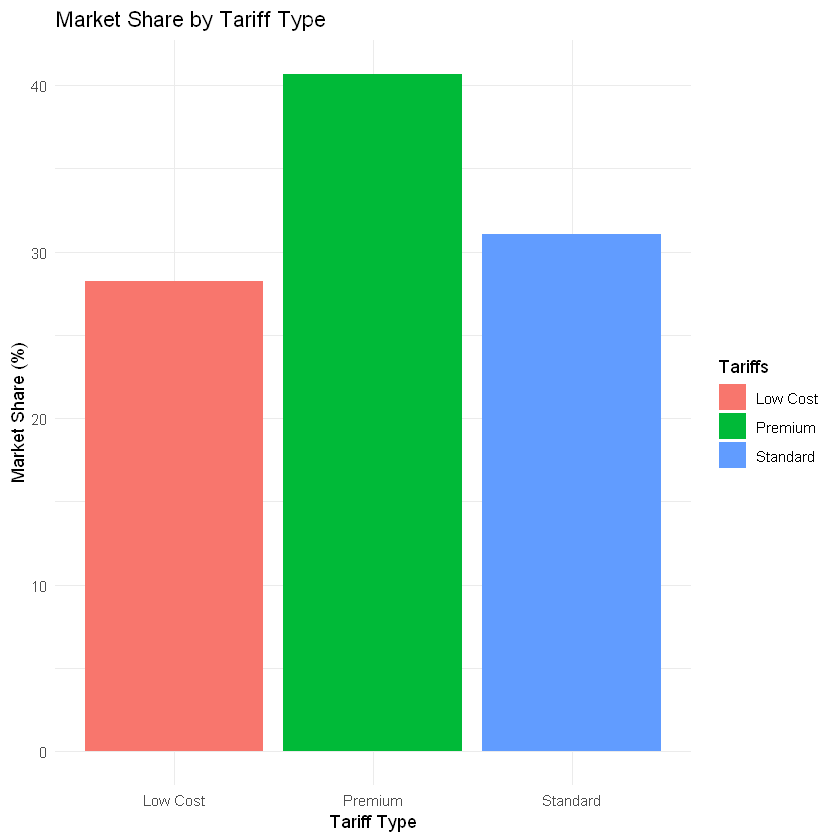

In [ ]:
#configuration of the tariffs
standard <- c('daily summary through website','two-hourly rate','setup with quick verification',
              'standard business hours')
premium <-c('real-time monitoring through app',
            'fixed rate',
            'directly on the website',
            '24h available')
low <- c('only on the bill',
         'multi-hourly rate',
         'activation after one week',
         'email support')

products <- data.frame(rbind(standard, premium, low))

products <- data.frame(lapply(products, as.factor))
colnames(products) <- c('A1', 'A2', 'A3', 'A4')

prediction <- predict(data.conjoint, products)
#market-share computation
calculate_percentages <- function(prediction) {
  prediction_values <- c(prediction$Prediction)  
  percentages <- prediction_values / sum(prediction_values) * 100
  return(data.frame(
    standard_perc = percentages[1],
    premium_perc = percentages[2],
    low_perc = percentages[3]
  ))
}
market.share <- data.frame(calculate_percentages(prediction))
print(market.share)

#Prepare data for ggplot
market.share <- data.frame(Tariffs = c('Standard', 'Premium', 'Low Cost'), 'MarketShare' = c(market.share$standard_perc, market.share$premium_perc, market.share$low_perc))

#visualization
ggplot(market.share, aes(x = Tariffs, y = MarketShare, fill = Tariffs)) +
  geom_bar(stat = "identity") +
  labs(title = "Market Share by Tariff Type", x = "Tariff Type", y = "Market Share (%)") +
  theme_minimal()




**Introduction of a new product**

We assume that a balanced option is introduced:

**Balanced option**
A1: Daily summary through website
A2: Two-hourly rate
A3: Setup with quick verification 
A4: 24h available

   Tariffs MarketShare
1 Standard    22.60024
2  Premium    29.61725
3 Low Cost    20.56501
4 Balanced    27.21750


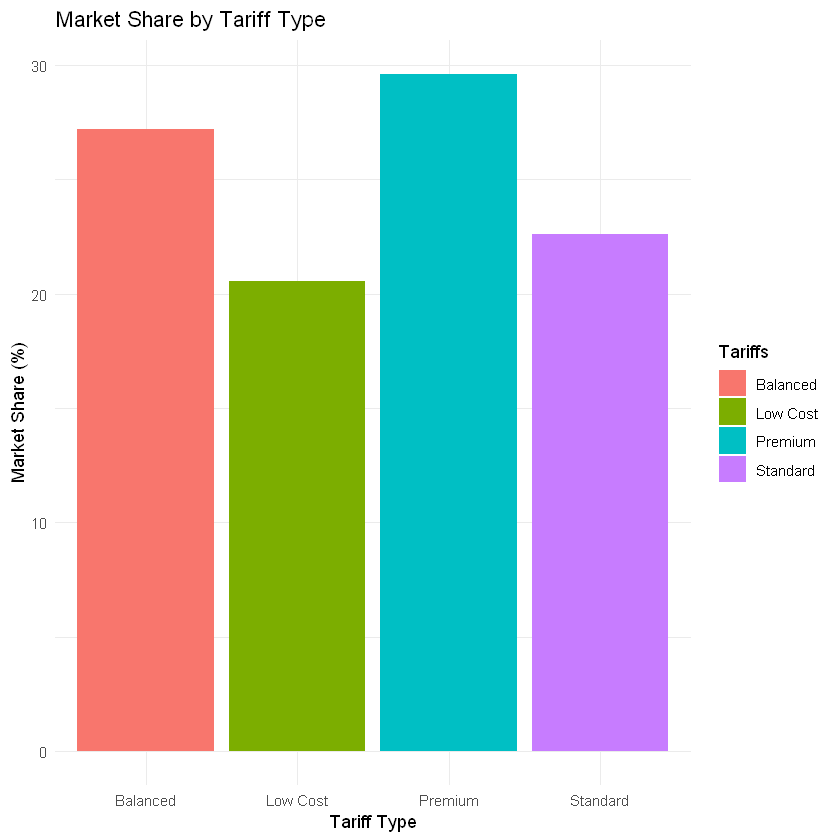

In [ ]:
#configuration of the tariff
balanced <- c('daily summary through website', 'two-hourly rate', 'setup with quick verification', '24h available')
products2 <- data.frame(rbind(standard, premium, low, balanced))

products2 <- data.frame(lapply(products2, as.factor))
colnames(products2) <- c('A1', 'A2', 'A3', 'A4')

#market-share computation with the balanced option included
calculate_percentages2 <- function(prediction) {
  prediction_values <- c(prediction$Prediction)  
  percentages <- prediction_values / sum(prediction_values) * 100
  return(data.frame(
    standard_perc = percentages[1],
    premium_perc = percentages[2],
    low_perc = percentages[3],
    balanced_perc = percentages[4]
  ))
}
prediction2 <- predict(data.conjoint, products2)
market.share2 <- data.frame(calculate_percentages2(prediction2))


#Prepare data for ggplot
market.share2 <- data.frame(Tariffs = c('Standard', 'Premium', 'Low Cost', 'Balanced'), 
'MarketShare' = c(market.share2$standard_perc, market.share2$premium_perc, market.share2$low_perc, market.share2$balanced_perc))

#visualization
ggplot(market.share2, aes(x = Tariffs, y = MarketShare, fill = Tariffs)) +
  geom_bar(stat = "identity") +
  labs(title = "Market Share by Tariff Type", x = "Tariff Type", y = "Market Share (%)") +
  theme_minimal()

print(market.share2)



The Premium Plan remains the most preferred option (29.61%) while experiencing a consistent drop, indicating that the two-hourly rate option remain an attractive element to consumers. The Standard Plan (22.60%) sees a drop from the previous simulation (31.00%) as some consumers shift towards the Balanced Plan, which contains an upgrade of the technical assistance factor. This suggests that many users still value the possibility of a quick solution for eventual overloads or shortages. The Low-Cost Plan (20.56%) remains the least popular, reinforcing the idea that limited customer support and lack of digital tools reduce attractiveness. However, this plan could still serve a niche of highly price-sensitive customers.


# Step 5: K-means segment-based conjoint analysis and market-share simulation

In [ ]:
#Convertion of Python indeces to R indeces.
#Rows assigned to Cluster 1:
segment1 <- c(0, 1, 4, 5, 6, 8, 9, 10, 23, 30, 47, 56, 61, 70, 75, 76, 79, 80, 82, 86, 87) +1
#Rows assigned to Cluster 2:
segment2 <- c(3, 7, 11, 24, 26, 27, 34, 35, 36, 38, 42, 45, 52, 55, 66, 67, 69, 71, 72, 73, 77, 81, 88) +1
#Rows assigned to Cluster 3:
segment3 <- c(12, 14, 16, 17, 18, 20, 22, 28, 29, 31, 32, 37, 40, 44, 46, 48, 51, 57, 58, 59, 60, 62, 64, 65, 68, 74, 84, 85) +1
#Rows assigned to Cluster 4:
segment4 <- c(2, 13, 15, 19, 21, 25, 33, 39, 41, 43, 49, 50, 53, 54, 63, 78, 83, 89) + 1


data.segment1 <- df[df$Respondent %in% segment1, ]
data.segment2 <- df[df$Respondent %in% segment2, ]
data.segment3 <- df[df$Respondent %in% segment3, ]
data.segment4 <- df[df$Respondent %in% segment4, ]


*A more detailed description of the segments is provided in the segmentation code*
### K-Means Segments Description:

**Segment1**: Older, large-house consumers. <br>
**Segment2**: High-income, large-house, seasonal user. <br>
**Segment3**: Low-income, moderate energy consumers. <br>
**Segment4**: Small, loyal, consistent users. 

In [14]:
#conjoint analysis for the segments

conjoint.segment1 <-conjoint(data.segment1, rvar = 'Ratings', evar=c('A1', 'A2', 'A3', 'A4'))

summary(conjoint.segment1)

Conjoint analysis
Data                 : data.segment1 
Response variable    : Ratings 
Explanatory variables: A1, A2, A3, A4 

Conjoint part-worths:
   Attributes                           Levels     PW
 A1           daily summary through website     0.000
 A1           only on the bill                  0.016
 A1           real-time monitoring through app  0.079
 A2           fixed rate                        0.000
 A2           multi-hourly rate                 0.429
 A2           two-hourly rate                   0.524
 A3           activation after one week         0.000
 A3           directly on the website          -0.063
 A3           setup with quick verification    -0.222
 A4           24h available                     0.000
 A4           email support                    -0.651
 A4           standard business hours          -0.492
 Base utility ~                                 2.714

Conjoint importance weights:
 Attributes    IW
         A1 0.054
         A2 0.355
         A

In [15]:
conjoint.segment2 <- conjoint(data.segment2, rvar = 'Ratings', evar=c('A1', 'A2', 'A3', 'A4'))
summary(conjoint.segment2)


Conjoint analysis
Data                 : data.segment2 
Response variable    : Ratings 
Explanatory variables: A1, A2, A3, A4 

Conjoint part-worths:
   Attributes                           Levels     PW
 A1           daily summary through website     0.000
 A1           only on the bill                 -0.145
 A1           real-time monitoring through app  0.377
 A2           fixed rate                        0.000
 A2           multi-hourly rate                -0.014
 A2           two-hourly rate                   0.072
 A3           activation after one week         0.000
 A3           directly on the website           0.188
 A3           setup with quick verification    -0.261
 A4           24h available                     0.000
 A4           email support                    -0.812
 A4           standard business hours          -0.696
 Base utility ~                                 3.536

Conjoint importance weights:
 Attributes    IW
         A1 0.279
         A2 0.047
         A

In [16]:
conjoint.segment3 <- conjoint(data.segment3, rvar = 'Ratings', evar=c('A1', 'A2', 'A3', 'A4'))
summary(conjoint.segment3)


Conjoint analysis
Data                 : data.segment3 
Response variable    : Ratings 
Explanatory variables: A1, A2, A3, A4 

Conjoint part-worths:
   Attributes                           Levels     PW
 A1           daily summary through website     0.000
 A1           only on the bill                 -0.274
 A1           real-time monitoring through app  0.190
 A2           fixed rate                        0.000
 A2           multi-hourly rate                 0.024
 A2           two-hourly rate                   0.143
 A3           activation after one week         0.000
 A3           directly on the website           0.155
 A3           setup with quick verification    -0.131
 A4           24h available                     0.000
 A4           email support                    -0.810
 A4           standard business hours          -0.631
 Base utility ~                                 3.440

Conjoint importance weights:
 Attributes    IW
         A1 0.273
         A2 0.084
         A

In [17]:
conjoint.segment4 <- conjoint(data.segment4, rvar = 'Ratings', evar=c('A1', 'A2', 'A3', 'A4'))
summary(conjoint.segment4)


Conjoint analysis
Data                 : data.segment4 
Response variable    : Ratings 
Explanatory variables: A1, A2, A3, A4 

Conjoint part-worths:
   Attributes                           Levels     PW
 A1           daily summary through website     0.000
 A1           only on the bill                 -0.389
 A1           real-time monitoring through app  0.093
 A2           fixed rate                        0.000
 A2           multi-hourly rate                 0.019
 A2           two-hourly rate                   0.019
 A3           activation after one week         0.000
 A3           directly on the website           0.222
 A3           setup with quick verification    -0.019
 A4           24h available                     0.000
 A4           email support                    -0.426
 A4           standard business hours          -0.370
 Base utility ~                                 3.426

Conjoint importance weights:
 Attributes    IW
         A1 0.413
         A2 0.016
         A

In [18]:
#adding the reference levels (0) to the coefficients taken from the conjoint function

pwutilities.segment1 <- as.vector(conjoint.segment1$model_list$full$coeff$coefficient)
add_values_at_positions <- function(vector, value, positions) {
  for (p in rev(positions))
    vector <- append(vector, value, after = p - 1)
  return(vector)
}

positions <- c(2, 4, 6, 8)
pwutilities.segment1 <- add_values_at_positions(pwutilities.segment1, 0, positions)

pwutilities.segment2 <- as.vector(conjoint.segment2$model_list$full$coeff$coefficient)
pwutilities.segment2 <- add_values_at_positions(pwutilities.segment2, 0, positions)


pwutilities.segment3 <- as.vector(conjoint.segment3$model_list$full$coeff$coefficient)
pwutilities.segment3 <- add_values_at_positions(pwutilities.segment3, 0, positions)

pwutilities.segment4 <- as.vector(conjoint.segment4$model_list$full$coeff$coefficient)
pwutilities.segment4 <- add_values_at_positions(pwutilities.segment4, 0, positions)




**Comparison of the part-worth utilities per attribute:**

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


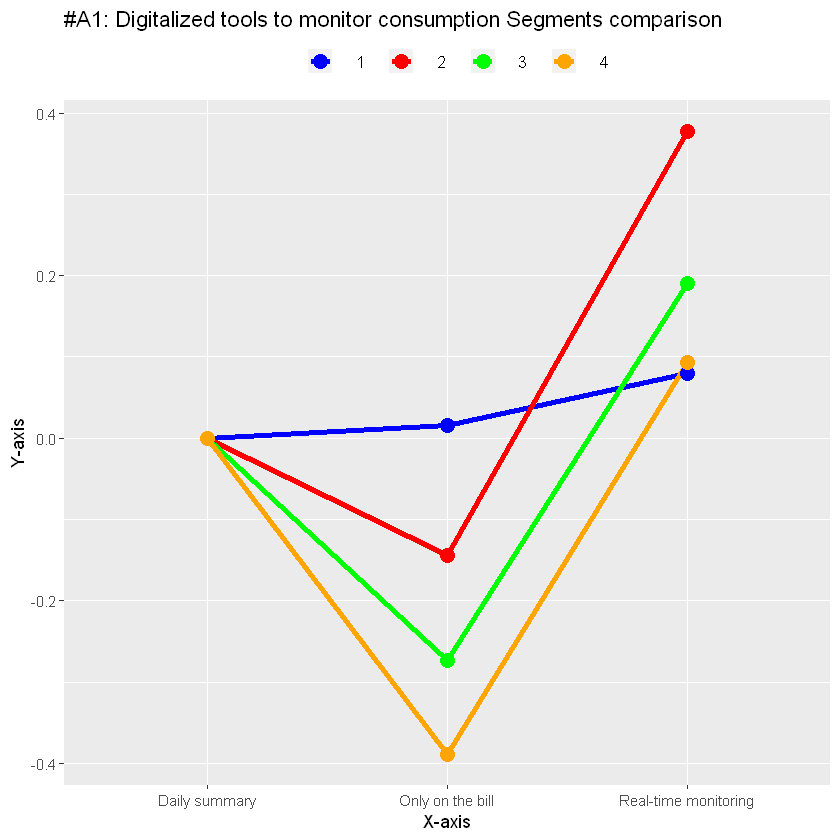

In [19]:
segments <- cbind(pwutilities.segment1[2:4], pwutilities.segment2[2:4], 
                  pwutilities.segment3[2:4], pwutilities.segment4[2:4])

# Create a data frame and reshape it
segments_df <- data.frame(
  x = rep(2:4, times = 4),
  y = as.vector(segments),
  segment = factor(rep(1:4, each = 3))
)

# Define colors for each segment
colors <- c("blue", "red", "green", "orange")

# Create the plot  
ggplot(segments_df, aes(x = factor(x), y = y, color = segment, group = segment)) +
  geom_line(size = 1.5) + 
  geom_point(size = 4) +
  scale_color_manual(values = colors) +
  labs(x = "X-axis", y = "Y-axis", 
       title = "#A1: Digitalized tools to monitor consumption Segments comparison") +
  scale_x_discrete(labels = c("Daily summary", "Only on the bill", "Real-time monitoring")) +
  theme_gray() +
  theme(legend.title = element_blank(), 
        legend.position = "top",      
        legend.key.size = unit(1, "lines"),  
        legend.text = element_text(size = 10),  
        legend.spacing.x = unit(0.5, 'cm')) +  
  guides(color = guide_legend(override.aes = list(size = 4)))

The trend of utility regarding consumption monitoring is quite homogeneous between segments, with **Segment4** obtaining the highest utility. <br>
**Segment1**, on the other hand, represents a voice out of the chorus, showing itself to be quite indifferent (**importance weight 0.054**) at almost all levels of the attribute. This segment is mostly composed by older users with a higher than average consumption. Even though the moderate usage of energy may suggest the need of monitoring it, the age could represent a barrier to the acceptance of digital services. 

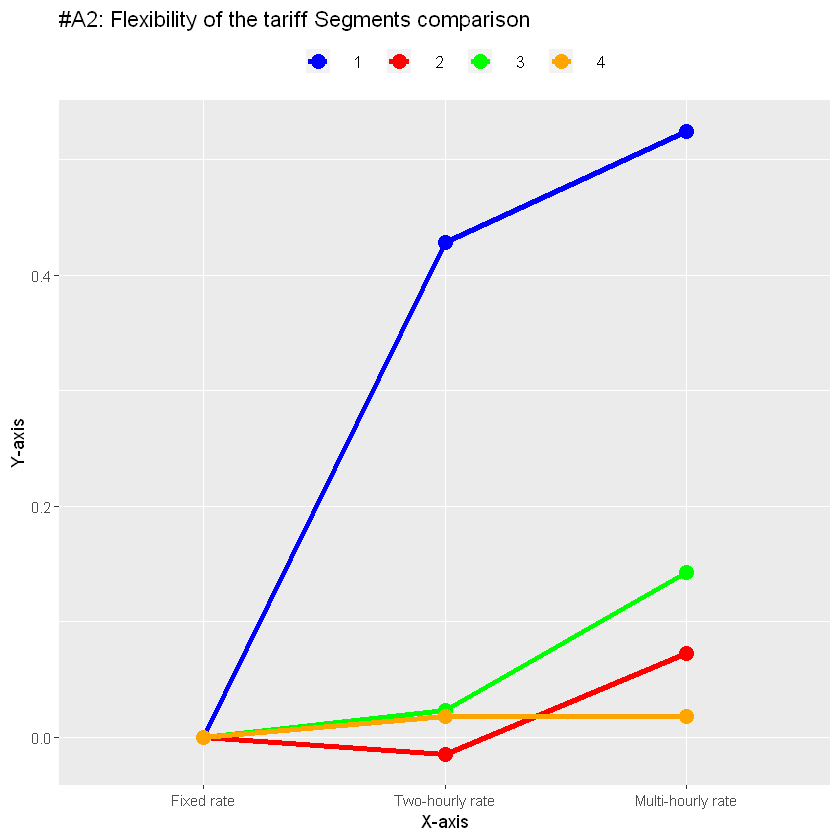

In [20]:
segments <- cbind(pwutilities.segment1[5:7], pwutilities.segment2[5:7], 
                  pwutilities.segment3[5:7], pwutilities.segment4[5:7])

# Create a data frame and reshape it
segments_df <- data.frame(
  x = rep(2:4, times = 4),
  y = as.vector(segments),
  segment = factor(rep(1:4, each = 3))
)


ggplot(segments_df, aes(x = factor(x), y = y, color = segment, group = segment)) +
  geom_line(size = 1.5) + 
  geom_point(size = 4) +
  scale_color_manual(values = colors) +
  labs(x = "X-axis", y = "Y-axis", 
       title = "#A2: Flexibility of the tariff Segments comparison") +
  scale_x_discrete(labels = c("Fixed rate", "Two-hourly rate", "Multi-hourly rate")) +
  theme_gray() +
  theme(legend.title = element_blank(), 
        legend.position = "top",      
        legend.key.size = unit(1, "lines"),  
        legend.text = element_text(size = 10), 
        legend.spacing.x = unit(0.5, 'cm')) + 
  guides(color = guide_legend(override.aes = list(size = 4)))

Consistent with what we saw before, **Segment1** is the one that benefits the most from the creation of price ranges, due to the higher than average consumption habits. <br>
**Segment2** and **Segment3** are respectively the highest and the lowest income users. Despite their completely opposite features, they still share a very similar pattern, probably due to different reasons (with a slight higher utility for **Segment3**). A high-consumption and low-income cluster surely benefits from the existence of different bands of price. On the other side, **Segment2** has a strong seasonal component (consumption accumulates in certain seasons), making a flexible tariff a good option for this specific need. <br>
**Segment4** is composed by small households living in small houses. Having a stable consumption flow, sensitivity to flexibility is low.


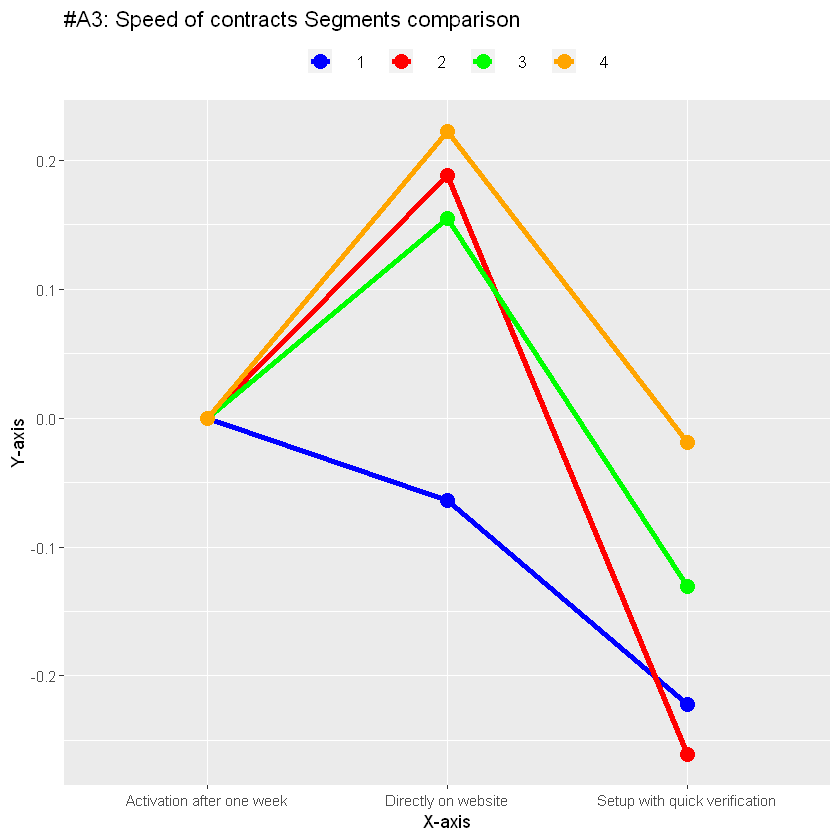

In [21]:
segments <- cbind(pwutilities.segment1[8:10], pwutilities.segment2[8:10], 
                  pwutilities.segment3[8:10], pwutilities.segment4[8:10])

# Create a data frame and reshape it
segments_df <- data.frame(
  x = rep(2:4, times = 4),
  y = as.vector(segments),
  segment = factor(rep(1:4, each = 3))
)


ggplot(segments_df, aes(x = factor(x), y = y, color = segment, group = segment)) +
  geom_line(size = 1.5) + 
  geom_point(size = 4) +
  scale_color_manual(values = colors) +
  labs(x = "X-axis", y = "Y-axis", 
       title = "#A3: Speed of contracts Segments comparison") +
  scale_x_discrete(labels = c("Activation after one week", "Directly on website", "Setup with quick verification")) +
  theme_gray() +
  theme(legend.title = element_blank(), 
        legend.position = "top",      
        legend.key.size = unit(1, "lines"),  
        legend.text = element_text(size = 10),  
        legend.spacing.x = unit(0.5, 'cm')) +  
  guides(color = guide_legend(override.aes = list(size = 4)))

All the segments agree that the closing of a contract should be quick and painless, even though **Segment1** is the cluster yielding the lowest utility from a quick contract. This behaviour is consistent with the previous result and with the disinterest that this segments manifests towards digital services.

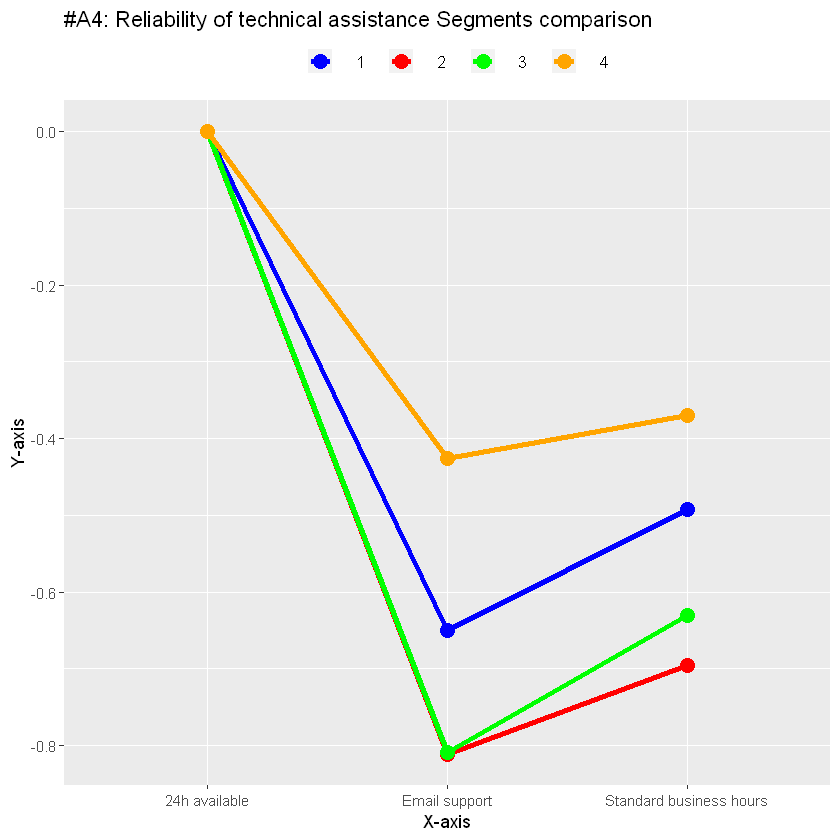

In [22]:
#Prepare the data for ggplot
segments <- cbind(pwutilities.segment1[11:13], pwutilities.segment2[11:13], 
                  pwutilities.segment3[11:13], pwutilities.segment4[11:13])

# Create a data frame and reshape it
segments_df <- data.frame(
  x = rep(2:4, times = 4),
  y = as.vector(segments),
  segment = factor(rep(1:4, each = 3))
)


ggplot(segments_df, aes(x = factor(x), y = y, color = segment, group = segment)) +
  geom_line(size = 1.5) + 
  geom_point(size = 4) +
  scale_color_manual(values = colors) +
  labs(x = "X-axis", y = "Y-axis", 
       title = "#A4: Reliability of technical assistance Segments comparison") +
  scale_x_discrete(labels = c("24h available", "Email support", "Standard business hours")) +
  theme_gray() +
  theme(legend.title = element_blank(), 
        legend.position = "top",      
        legend.key.size = unit(1, "lines"), 
        legend.text = element_text(size = 10),  
        legend.spacing.x = unit(0.5, 'cm')) +  
  guides(color = guide_legend(override.aes = list(size = 4)))

**Segment4** is the only one which do not give this attribute the highest weight (on the contrary, all the other segments show an important sensitiveness to technical assistance), manifesting higher enthusiasm for digital applications. The house size may also play a part in this result, making it ideal candidates for low-consumption and low probability of energy overloads or shortages. The prevalence of an apartement-type of house, in addition, suggests a technical assistance managed and organized by the building administration, which does not make this factor a priority for this cluster.

In [23]:
# Predictions for the new product configurations
prediction.segment1 <- predict(conjoint.segment1, products)
prediction.segment2 <- predict(conjoint.segment2, products)
prediction.segment3 <- predict(conjoint.segment3, products)
prediction.segment4 <- predict(conjoint.segment4, products)

#market share computation with the "calculate percentages" function

ms.segment1 <- data.frame(calculate_percentages(prediction.segment1))
ms.segment2 <- data.frame(calculate_percentages(prediction.segment2))
ms.segment3 <- data.frame(calculate_percentages(prediction.segment3))
ms.segment4 <- data.frame(calculate_percentages(prediction.segment4))


   Segment Standard  Premium Low_Cost
1 Segment1 32.51534 35.17382 32.31084
2 Segment2 28.46034 44.01244 27.52722
3 Segment3 31.39073 42.11921 26.49007
4 Segment4 32.41650 39.68566 27.89784


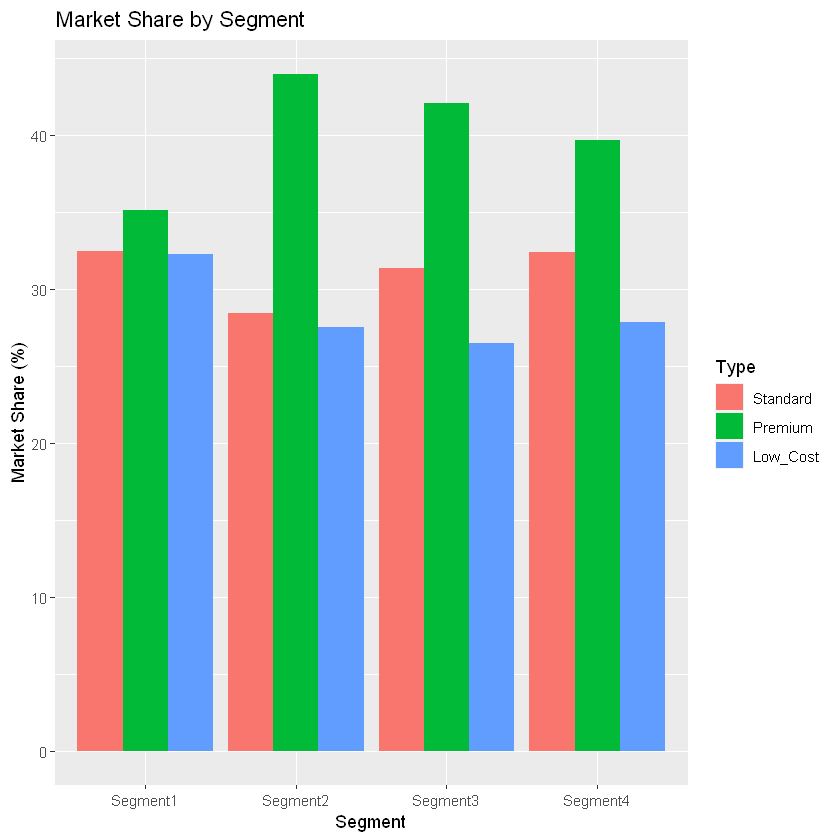

In [24]:
#Prepare data for ggplot
segment.conjoint <- data.frame(
  Segment = c("Segment1", "Segment2", "Segment3", "Segment4"),
  Standard = c(ms.segment1$standard_perc, ms.segment2$standard_perc, 
               ms.segment3$standard_perc, ms.segment4$standard_perc),
  Premium = c(ms.segment1$premium_perc, ms.segment2$premium_perc, 
              ms.segment3$premium_perc, ms.segment4$premium_perc),
  Low_Cost = c(ms.segment1$low_perc, ms.segment2$low_perc, 
               ms.segment3$low_perc, ms.segment4$low_perc)
)

# Reshape data into long format
segment_long <- melt(segment.conjoint, id.vars = "Segment", variable.name = "Type", value.name = "MarketShare")

#visualization
ggplot(segment_long, aes(x = Segment, y = MarketShare, fill = Type)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Market Share by Segment",
       x = "Segment",
       y = "Market Share (%)",
       fill = "Type") +
  theme_grey()
print(segment.conjoint)



**Segment1** derives a more or less homogeneous utility from all tariffs, with a slightly higher percentage for the Premium one (thanks to the strong technical assistance). This result suggests that the price still plays an important role for this cluster, and that the additional services are easily replaceable. <br>
Being the segment with the highest income, **Segment2** shows low sensitivity to basic options with no services, even though the possibility of flexibility bands may help this cluster in optimizing its costs. This last exigence, however, does not seem to a priority. <br>
**Segment3** has a very similar pattern, with a slight higher market-share earned by the standard and the low-cost configurations. This results is quite interesting to highlight: considering their features, **Segment3** and **Segment2** are very different, but they show the same behaviour towards tariffs. Both the clusters are composed by a lower than average age households, which may lead to a shared enthusiasm towards digital tools. On the other side, the need for an efficient technical assistance may result from different necessities: from the lowest-income cluster, a new device would not be affordable, from the highest-income cluster, a large house needs more care and attention. <br>
**Segment4** is the most interested in the standard configuration tariff, whith the Premium offer still attracting an important slice of consumers (because of the interest towards digital tools). 




**Introduction of the new balanced option**

In [25]:

# Predictions for the new product configurations
prediction.segment1 <- predict(conjoint.segment1, products2)
prediction.segment2 <- predict(conjoint.segment2, products2)
prediction.segment3 <- predict(conjoint.segment3, products2)
prediction.segment4 <- predict(conjoint.segment4, products2)

#market share computation with the "calculate percentage2" function (that contains the balanced option)

ms.segment1 <- calculate_percentages2(prediction.segment1)
ms.segment2 <- calculate_percentages2(prediction.segment2)
ms.segment3 <- calculate_percentages2(prediction.segment3)
ms.segment4 <- calculate_percentages2(prediction.segment4)


   Segment Standard  Premium Low_Cost Balanced
1 Segment1 23.41679 25.33137 23.26951 27.98233
2 Segment2 20.93822 32.37986 20.25172 26.43021
3 Segment3 22.67943 30.43062 19.13876 27.75120
4 Segment4 23.77522 29.10663 20.46110 26.65706


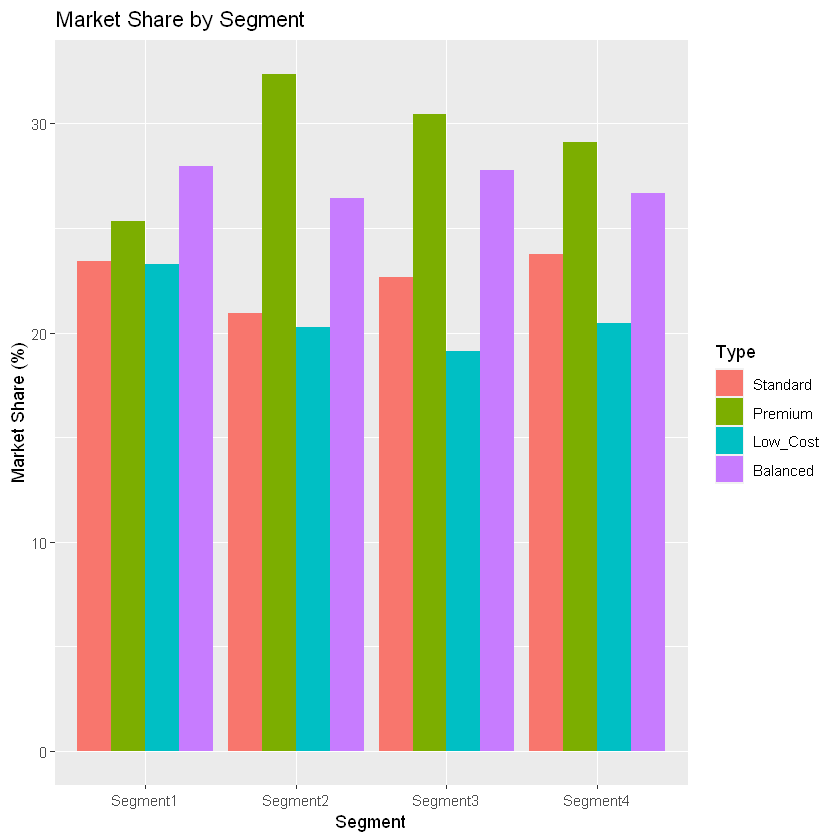

In [26]:
#Prepare data for ggplot
segment.conjoint <- data.frame(
  Segment = c("Segment1", "Segment2", "Segment3", "Segment4"),
  Standard = c(ms.segment1$standard_perc, ms.segment2$standard_perc, 
               ms.segment3$standard_perc, ms.segment4$standard_perc),
  Premium = c(ms.segment1$premium_perc, ms.segment2$premium_perc, 
              ms.segment3$premium_perc, ms.segment4$premium_perc),
  Low_Cost = c(ms.segment1$low_perc, ms.segment2$low_perc, 
               ms.segment3$low_perc, ms.segment4$low_perc),
  Balanced = c(ms.segment1$balanced_perc, ms.segment2$balanced_perc, 
               ms.segment3$balanced_perc, ms.segment4$balanced_perc))

# Reshape data into long format
segment_long <- melt(segment.conjoint, id.vars = "Segment", variable.name = "Type", value.name = "MarketShare")

#visualization
ggplot(segment_long, aes(x = Segment, y = MarketShare, fill = Type)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Market Share by Segment",
       x = "Segment",
       y = "Market Share (%)",
       fill = "Type") +
  theme_grey()
print(segment.conjoint)

With the introduction of a new balanced option, all the fares share a more or less homogeneous market-share, with a large part of the market absorbed by the standard and the premium configurations. 
**segment1** shows an incredible sensitiveness to this tariff, which, for the same rate of the standard configuration, provides an upgrade of the technical assistance (from the standard business hours to a 24h available support) while meeting the financial needs with a two-hourly rate.  
**Segment2** still prioritizes the premium offer as **Segment3**; the two clusters experience approximately the same market-share drops of the other tariffs.
The same reasonment is applicable to **Segment4**, which still keep the highest market-share for the standard configuration. 

# Conclusions <br>
**“The boomers”**, Segment 1: this group showed a reduced utility and disinterest towards digital tools. Better to target it with a balanced offer: providing a low digital services in exchange of a saving-wise tariff and a good technical assistance represents the option that better meets this cluster's needs. <br>
<br>
**"The opposite poles"**, Segment 2 and 3: these two clusters share the most diverse features, and yet, the patterns turn out to be very similar. This teaches an important lesson: 
1) income may not be the most relevant demographical variable, while age may play a more important role;
2) different needs might have the same solution, but need to be advertised differently. The Premium offer looks the best deal for both. <br>
<br>

**“The lazy”**, Segment 4: the loyal component of this cluster suggests a choice mostly determined by the popularity of the company. This segments showed a little reaction to dynamic pricing - due to the low consumption of a small household - and to an efficient technical assistance - due to the apartment-based component of the segment. 
This enforces the idea that a Premium tariff may not be the right one to advertise in the long-term, on the contrary, a good investment in the balanced option may lead many of this segment consumers more satisfied for the consumption savings.
